In [ ]:
#VERSION DE OPENCV PARA UTILIZAR LA FUNCIÓN DE SIFT

!pip install opencv-contrib-python==4.4.0.44

In [ ]:
import  cv2 
import  numpy  as  np 
import  os 
import  matplotlib.pyplot  as  plt 
import  random 
import  pylab  as  pl 
from  sklearn.metrics  import  confusion_matrix , precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!mkdir dataset
!cp -r /content/drive/MyDrive/Dataset_caras /content/dataset/

In [ ]:
train_path='/content/dataset/Dataset_caras'
class_names=os.listdir(train_path)

In [ ]:
print(class_names)

['John_Jairo', 'Juan_Camilo']


In [ ]:
image_paths=[]
image_classes=[]

def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [ ]:
for training_name in class_names:
    dir_=os.path.join(train_path,training_name)
    class_path=img_list(dir_)
    image_paths+=class_path

In [ ]:
len(image_paths)

400

In [ ]:
image_classes_0=[0]*(len(image_paths)//2)
image_classes_1=[1]*(len(image_paths)//2)
image_classes=image_classes_0+image_classes_1

In [ ]:
D=[]

for i in range(len(image_paths)):
    D.append((image_paths[i],image_classes[i]))

In [ ]:
dataset = D
random.shuffle(dataset)
train = dataset[:300]
test = dataset[300:]

image_paths, y_train = zip(*train)
image_paths_test, y_test = zip(*test)

In [ ]:
des_list=[]
sift= cv2.xfeatures2d.SIFT_create()

In [ ]:
im=cv2.imread(image_paths[1])

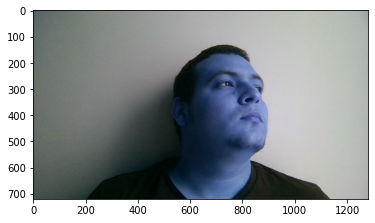

In [ ]:
plt.imshow(im)

In [ ]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

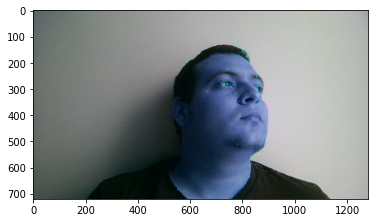

In [ ]:
kp = sift.detect(im,None)
kp, des = sift.compute(im, kp)
img=draw_keypoints(im,kp)

In [ ]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=sift.detect(im,None)
    keypoints,descriptor= sift.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [ ]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [ ]:
descriptors.shape

(83328, 128)

In [ ]:
descriptors_float=descriptors.astype(float)

In [ ]:
from scipy.cluster.vq import kmeans,vq

k=20
voc,variance=kmeans(descriptors_float,k,1)

In [ ]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [ ]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

In [ ]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

LinearSVC(max_iter=80000)

In [ ]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(activation='relu', hidden_layer_sizes=(200,100,2), learning_rate='constant', max_iter=400, momentum=0.9, solver='adam', verbose=False)

In [ ]:
classifier.fit(im_features,np.array(y_train))

MLPClassifier(hidden_layer_sizes=(200, 100, 2), max_iter=400)

In [ ]:
des_list_test=[]

for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=sift.detect(image,None)
    keypoints_test,descriptor_test= sift.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))

In [ ]:
len(image_paths_test)

100

In [ ]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [ ]:
test_features=stdslr.transform(test_features)

In [ ]:
from
 sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

def matriz_confusion(y_train,y_pred):  #definicion de funcion para matriz de confusion

  fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)

  print('Accuracy: %.2f' % accuracy_score(y_train, y_pred))
  sns.heatmap(confusion_matrix(y_train, y_pred), fmt=".2f", annot=True, ax=ax[0],xticklabels=('John_J','Juan_ca'),yticklabels=('John_J','Juan_ca'));   #se realiza el grafico de matriz de confusion 
  sns.heatmap(confusion_matrix(y_train, y_pred, normalize='true'), fmt=".2f", annot=True, ax=ax[1],xticklabels=('John_J','Juan_ca'),yticklabels=('John_J','Juan_ca')); #se realiza el grafico de matriz de confusion con valores normalizados
  print(classification_report(y_train, y_pred))

In [ ]:
y_pred_SVM=clf.predict(test_features)
y_pred_MLP=classifier.predict(test_features)

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.98      0.98      0.98        51

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



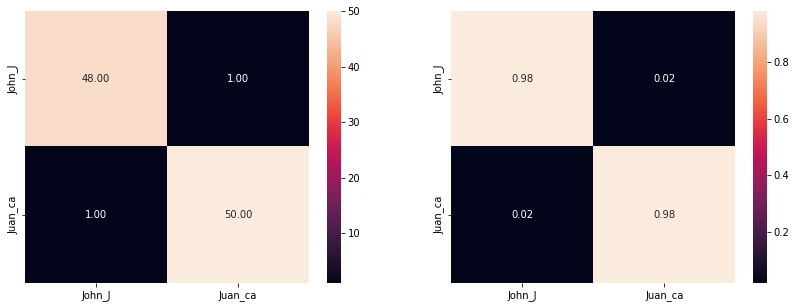

In [ ]:
matriz_confusion(y_test,y_pred_SVM)

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      1.00      0.99        51

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



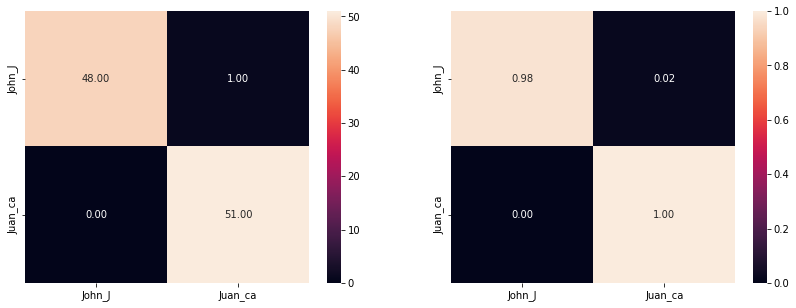

In [ ]:
matriz_confusion(y_test,y_pred_MLP)